**Introduction**

This project analyze the restaurants data to help restaurant increase their number of order and give specific recommendations and insights backed by analysis. The dataset includes information on menu items, restaurant performance, and customer orders, including both individual orders and summarized order trends. By leveraging these datasets, the analysis aims to identify popular menu items, peak sales hours and days, and high-demand locations, enabling restaurants to optimize human resource management, menu offerings, and operational efficiency. The project utilizes Google Colab for data processing and visualization, ensuring a structured approach to deriving insights that can help restaurants increase sales and improve customer experience.

# Loading and Preparing Data for Analysis


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: download items.pickle, restaurants.pickle,restaurants.pickle and orders.pickle from Canvas
# Upload to Google Colab
# Run this cell
df_items = pd.read_pickle('/content/drive/MyDrive/MBAn/Semester 01 /Python for Data Analysis /items.pickle')
df_restaurants = pd.read_pickle('/content/drive/MyDrive/MBAn/Semester 01 /Python for Data Analysis /restaurants.pickle')
df_orders = pd.read_pickle('/content/drive/MyDrive/MBAn/Semester 01 /Python for Data Analysis /orders.pickle')
df_orders_7 = pd.read_pickle('/content/drive/MyDrive/MBAn/Semester 01 /Python for Data Analysis /orders_7.pickle')
df_summarized_orders = pd.read_pickle('/content/drive/MyDrive/MBAn/Semester 01 /Python for Data Analysis /summarized_orders.pickle')

#   Display the data

In [ ]:
# Display the heads of each DataFrame to see what each table is about and create analysis
print("Items DataFrame:")
print(df_items.head(), "\n")

print("Restaurants DataFrame:")
print(df_restaurants.head(), "\n")

print("Orders DataFrame:")
print(df_orders.head(), "\n")

print("Orders_7 DataFrame:")
print(df_orders_7.head(), "\n")

print("Summarized Orders DataFrame:")
print(df_summarized_orders.head(), "\n")

# prompt: generate .describe() for the data frames provided

print("Items DataFrame Description:")
print(df_items.describe(), "\n")

print("Restaurants DataFrame Description:")
print(df_restaurants.describe(), "\n")

print("Orders DataFrame Description:")
print(df_orders.describe(), "\n")

print("Orders_7 DataFrame Description:")
print(df_orders_7.describe(), "\n")

print("Summarized Orders DataFrame Description:")
print(df_summarized_orders.describe(), "\n")

# prompt: generate the rows and columns for all the data frames

print("Items DataFrame Shape:", df_items.shape, "\n")
print("Restaurants DataFrame Shape:", df_restaurants.shape, "\n")
print("Orders DataFrame Shape:", df_orders.shape, "\n")
print("Orders_7 DataFrame Shape:", df_orders_7.shape, "\n")
print("Summarized Orders DataFrame Shape:", df_summarized_orders.shape, "\n")


Items DataFrame:
  ITEM_ID                             ITEM_NAME     ITEM_TYPE
0      I7          Farro with Summer Vegetables         Bases
1     I39                       Spindrift Lemon        Drinks
2      I5                    Classic Brown Rice         Bases
3     I36                              Kombucha        Drinks
4      I8  Cauliflower with Garlic and Parmesan  Market Sides 

Restaurants DataFrame:
  RESTAURANT_ID          NAME                               ADDRESS  \
0        R10001      Columbia     2884 Broadway, New York, NY 10025   
1        R10002       Midtown      1379 6th Ave, New York, NY 10019   
2        R10005      Flatiron      40 W 25th St, New York, NY 10010   
3        R10008  Williamsburg       45 S 3rd St, Brooklyn, NY 11249   
4        R10004           NYU  109 Macdougal St, New York, NY 10012   

         LAT       LONG OPENING_DATE DELIVERY_START  
0  40.811470 -73.961230     8/9/2014     2017-01-01  
1  40.763640 -73.977960    3/19/2013     2018-05-01

# **Cleaning Process**

Before doing any analysis, we need to clean the tables. By cleaning the tables we will be able to:


*   Ensure Data Accuracy
*   Handles Missing Data
*   Standardize Data Formats
*   Remove Duplicates
*   Enhance Analytical Results
*   Facilitate Data Integration







In [ ]:
# df_items
# Replace NaN with 0 for numerical columns and 'Unknown' for text columns
df_items.fillna({
    'ITEM_NAME': 'Unknown',
    'ITEM_TYPE': 'Unknown'
}, inplace=True)

# Check and drop duplicates
duplicates_items = pd.DataFrame({
    'Metric': ['Duplicates'],
    'Count': [df_items.duplicated().sum()]
})
df_items = df_items.drop_duplicates()

# Generate cleaned dataset summary
cleaned_summary_items = pd.DataFrame({
    'Metric': ['Total Rows', 'Total Columns'],
    'Value': [len(df_items), len(df_items.columns)]
})

# Display results
print("Duplicates Count Table for df_items:")
display(duplicates_items)

print("\nCleaned Dataset Summary for df_items:")
display(cleaned_summary_items)


Duplicates Count Table for df_items:


,Metric,Count
0,Duplicates,0



Cleaned Dataset Summary for df_items:


,Metric,Value
0,Total Rows,31
1,Total Columns,3


In [ ]:
# df_restaurants
# Replace NaN with 0 for LAT/LONG and placeholders for other columns
df_restaurants.fillna({
    'LAT': 0,
    'LONG': 0,
    'ADDRESS': 'Unknown',
    'OPENING_DATE': pd.Timestamp.min,
    'DELIVERY_START': pd.Timestamp.min
}, inplace=True)

# Check and drop duplicates
duplicates_restaurants = pd.DataFrame({
    'Metric': ['Duplicates'],
    'Count': [df_restaurants.duplicated().sum()]
})
df_restaurants = df_restaurants.drop_duplicates()

# Standardize date-time columns
df_restaurants['OPENING_DATE'] = pd.to_datetime(df_restaurants['OPENING_DATE'], errors='coerce')
df_restaurants['DELIVERY_START'] = pd.to_datetime(df_restaurants['DELIVERY_START'], errors='coerce')

# Generate cleaned dataset summary
cleaned_summary_restaurants = pd.DataFrame({
    'Metric': ['Total Rows', 'Total Columns'],
    'Value': [len(df_restaurants), len(df_restaurants.columns)]
})

# Display results
print("Duplicates Count Table for df_restaurants:")
display(duplicates_restaurants)

print("\nCleaned Dataset Summary for df_restaurants:")
display(cleaned_summary_restaurants)

Duplicates Count Table for df_restaurants:


,Metric,Count
0,Duplicates,0



Cleaned Dataset Summary for df_restaurants:


,Metric,Value
0,Total Rows,8
1,Total Columns,7


In [ ]:
#df_orders
# Replace NaN with 0 for numerical columns and 'Unknown' for categorical columns
df_orders.fillna({
    'DRINKS': 0,
    'COOKIES': 0,
    'MAIN': 'Unknown',
    'BASE': 'Unknown',
    'SIDE_1': 'Unknown',
    'SIDE_2': 'Unknown'
}, inplace=True)

# Check and drop duplicates
duplicates_orders = pd.DataFrame({
    'Metric': ['Duplicates'],
    'Count': [df_orders.duplicated().sum()]
})
df_orders = df_orders.drop_duplicates()

# Standardize date-time
df_orders['DATETIME'] = pd.to_datetime(df_orders['DATETIME'], errors='coerce')

# Generate cleaned dataset summary
cleaned_summary_orders = pd.DataFrame({
    'Metric': ['Total Rows', 'Total Columns'],
    'Value': [len(df_orders), len(df_orders.columns)]
})

# Display results
print("Duplicates Count Table for df_orders:")
display(duplicates_orders)

print("\nCleaned Dataset Summary for df_orders:")
display(cleaned_summary_orders)

Duplicates Count Table for df_orders:


,Metric,Count
0,Duplicates,0



Cleaned Dataset Summary for df_orders:


,Metric,Value
0,Total Rows,2387224
1,Total Columns,10


In [ ]:
# Replace NaN with 'Unknown' for descriptive columns
df_orders_7.fillna({
    'MAIN_NAME': 'Unknown',
    'BASE_NAME': 'Unknown',
    'SIDE_1_NAME': 'Unknown',
    'SIDE_2_NAME': 'Unknown'
}, inplace=True)

# Check and drop duplicates
duplicates_orders_7 = pd.DataFrame({
    'Metric': ['Duplicates'],
    'Count': [df_orders_7.duplicated().sum()]
})
df_orders_7 = df_orders_7.drop_duplicates()

# Standardize date-time
df_orders_7['DATETIME'] = pd.to_datetime(df_orders_7['DATETIME'], errors='coerce')

# Generate cleaned dataset summary
cleaned_summary_orders_7 = pd.DataFrame({
    'Metric': ['Total Rows', 'Total Columns'],
    'Value': [len(df_orders_7), len(df_orders_7.columns)]
})

# Display results
print("Duplicates Count Table for df_orders_7:")
display(duplicates_orders_7)

print("\nCleaned Dataset Summary for df_orders_7:")
display(cleaned_summary_orders_7)


Duplicates Count Table for df_orders_7:


,Metric,Count
0,Duplicates,0



Cleaned Dataset Summary for df_orders_7:


,Metric,Value
0,Total Rows,2387224
1,Total Columns,15


In [ ]:
# Replace NaN with 0 for numerical columns
df_summarized_orders.fillna({
    'NUM_ORDERS': 0,
    'PERC_DELIVERY': 0
}, inplace=True)

# Check and drop duplicates
duplicates_summarized_orders = pd.DataFrame({
    'Metric': ['Duplicates'],
    'Count': [df_summarized_orders.duplicated().sum()]
})
df_summarized_orders = df_summarized_orders.drop_duplicates()

# Standardize date-time
df_summarized_orders['DATE'] = pd.to_datetime(df_summarized_orders['DATE'], errors='coerce')

# Generate cleaned dataset summary
cleaned_summary_summarized_orders = pd.DataFrame({
    'Metric': ['Total Rows', 'Total Columns'],
    'Value': [len(df_summarized_orders), len(df_summarized_orders.columns)]
})

# Display results
print("Duplicates Count Table for df_summarized_orders:")
display(duplicates_summarized_orders)

print("\nCleaned Dataset Summary for df_summarized_orders:")
display(cleaned_summary_summarized_orders)


Duplicates Count Table for df_summarized_orders:


,Metric,Count
0,Duplicates,0



Cleaned Dataset Summary for df_summarized_orders:


,Metric,Value
0,Total Rows,2806
1,Total Columns,4


# We focused on Customer Behavior, Operational Insights, and Menu Optimization to directly address the question: How can the restaurant increase its number of orders?
By analyzing customer behavior, we identify demand patterns like peak times and popular add-ons, enabling targeted promotions and upselling opportunities. Operational insights reveal how to tailor services, optimize delivery, and improve underperforming locations. Menu optimization prioritizes high-revenue items and addresses underperforming ones, ensuring offerings align with customer preferences. These analyses provide actionable recommendations to boost order volumesand drive overall growth.

#  **Customer Behavior**
What are the peak times for orders?

Which day/month generates the most orders?

Average order size

How often do customers order Extra items (drinks, cookies, or sides)?

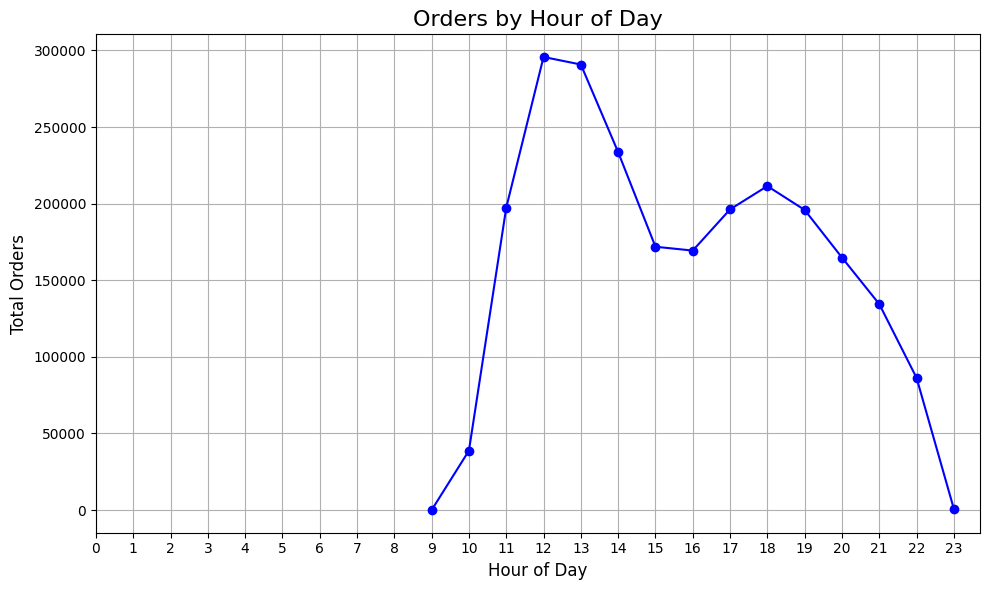

In [ ]:
#vizualization for the orders per hour
import matplotlib.pyplot as plt

# ----> Create and populate the peak_hours DataFrame <----
df_orders['HOUR'] = pd.to_datetime(df_orders['DATETIME']).dt.hour
peak_hours = df_orders.groupby('HOUR').size().reset_index(name='TOTAL_ORDERS')
peak_hours = peak_hours.sort_values(by='HOUR')

# Plot peak hours
plt.figure(figsize=(10, 6))
plt.plot(peak_hours['HOUR'], peak_hours['TOTAL_ORDERS'], marker='o', linestyle='-', color='blue')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.title('Orders by Hour of Day', fontsize=16)
plt.xticks(range(0, 24))  # Show all hours from 0 to 23
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
#Identify Peak Days of the Week
# Extract the day of the week from the DATETIME column
df_orders['DAY_OF_WEEK'] = pd.to_datetime(df_orders['DATETIME']).dt.day_name()

# Group orders by day of the week and count the total orders for each day
peak_days = df_orders.groupby('DAY_OF_WEEK').size().reset_index(name='TOTAL_ORDERS')

# Sort by the typical weekday order for readability
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
peak_days['DAY_OF_WEEK'] = pd.Categorical(peak_days['DAY_OF_WEEK'], categories=weekday_order, ordered=True)
peak_days = peak_days.sort_values(by='DAY_OF_WEEK')

print("Peak Days for Orders:")
display(peak_days)


Peak Days for Orders:


,DAY_OF_WEEK,TOTAL_ORDERS
1,Monday,361860
5,Tuesday,366464
6,Wednesday,365718
4,Thursday,365403
0,Friday,369041
2,Saturday,278223
3,Sunday,280515


<ipython-input-37-a181cfdfb98a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='DAY_OF_WEEK', y='TOTAL_ORDERS', data=peak_days, palette='viridis')


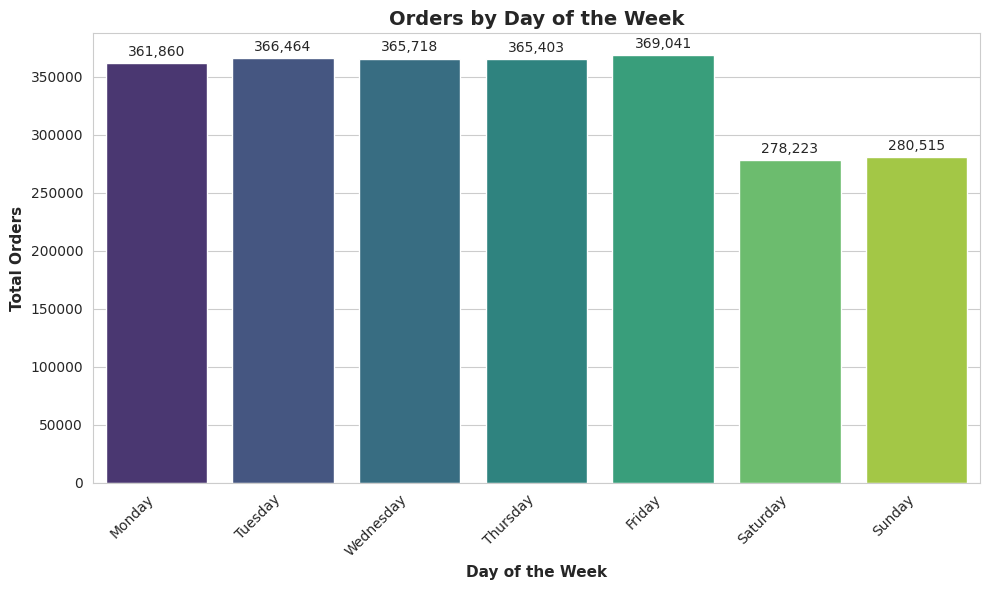

In [ ]:
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Figure
plt.figure(figsize=(10, 6))

# Plot the bar graph
bars = sns.barplot(x='DAY_OF_WEEK', y='TOTAL_ORDERS', data=peak_days, palette='viridis')

# Data labels
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height()):,}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center',
                  xytext=(0, 8), textcoords='offset points', fontsize=10)

# Customize labels and title
plt.xlabel('Day of the Week', fontsize=11, weight='bold')
plt.ylabel('Total Orders', fontsize=11, weight='bold')
plt.title('Orders by Day of the Week', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

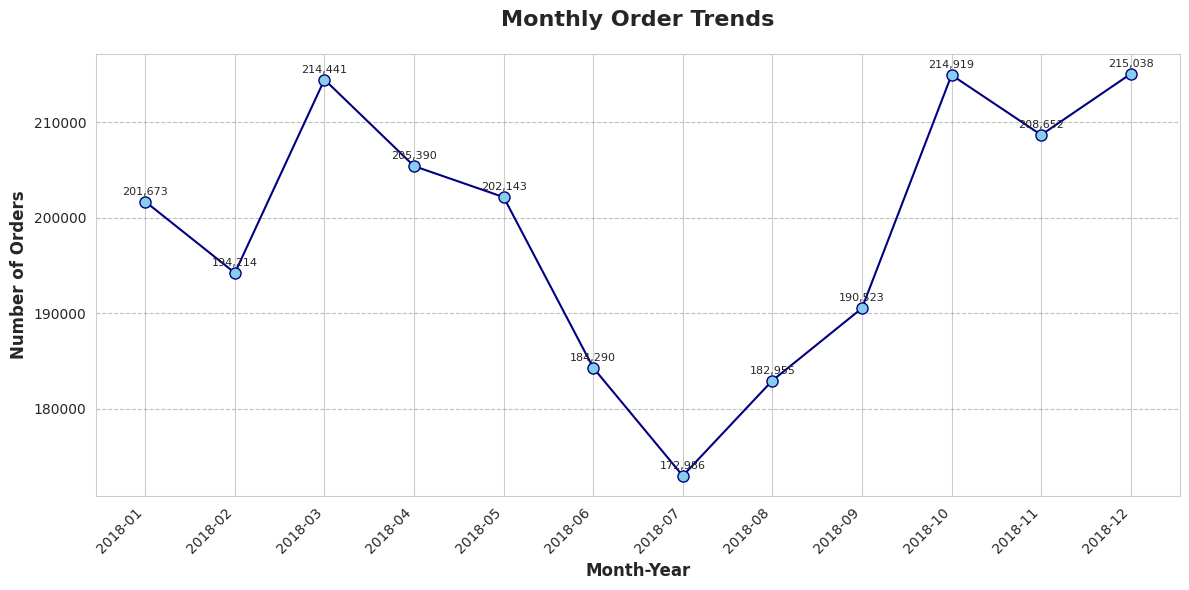

In [ ]:
# Ensure 'DATETIME' column is in datetime format
df_orders_7['DATETIME'] = pd.to_datetime(df_orders_7['DATETIME'])
df_orders_7['MONTH'] = df_orders_7['DATETIME'].dt.month
df_orders_7['YEAR'] = df_orders_7['DATETIME'].dt.year

# Extract the month and year from the 'DATETIME' column
monthly_orders = df_orders_7.groupby(['YEAR', 'MONTH']).size().reset_index(name='NUM_ORDERS')
monthly_orders['MONTH_YEAR'] = monthly_orders['YEAR'].astype(str) + '-' + monthly_orders['MONTH'].astype(str).str.zfill(2)

# Create the enhanced plot
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_orders['MONTH_YEAR'],
    monthly_orders['NUM_ORDERS'],
    marker='o',
    linestyle='-',
    color='navy',
    markersize=8,
    markerfacecolor='skyblue',
    markeredgewidth=1,
    markeredgecolor='navy'
)

# Data labels above each marker
for i, txt in enumerate(monthly_orders['NUM_ORDERS']):
    plt.annotate(
        f'{txt:,}',
        (monthly_orders['MONTH_YEAR'][i], monthly_orders['NUM_ORDERS'][i]),
        textcoords="offset points",
        xytext=(0, 5),  # Offset above the marker
        ha='center',
        fontsize=8
    )

# Customize labels and title
plt.title('Monthly Order Trends', fontsize=16, weight='bold', pad=20)  # More descriptive title
plt.xlabel('Month-Year', fontsize=12, weight='bold')
plt.ylabel('Number of Orders', fontsize=12, weight='bold')

# Enhance x-axis formatting
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add a subtle grid
plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray')  # Softer grid

# Set a clean background
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# How Often Do Customers Order Drinks, Cookies, or Sides?
# Important to know because these are add-ons or optional extras that enhance the customer’s main order

# Calculate the number of orders with drinks, cookies, or sides
drinks_orders = (df_orders['DRINKS'] > 0).sum()
cookies_orders = (df_orders['COOKIES'] > 0).sum()
side_orders = ((df_orders['SIDE_1'] != 'Unknown') | (df_orders['SIDE_2'] != 'Unknown')).sum()

# Create a summary DataFrame
order_summary = pd.DataFrame({
    'Category': ['Drinks', 'Cookies', 'Sides'],
    'Number of Orders': [drinks_orders, cookies_orders, side_orders]
})

# Calculate percentage of total orders for each category
total_orders = len(df_orders)
order_summary['Percentage'] = (order_summary['Number of Orders'] / total_orders) * 100

# Display the results
print("How Often Do Customers Order Drinks, Cookies, or Sides?")
display(order_summary)


How Often Do Customers Order Drinks, Cookies, or Sides?


,Category,Number of Orders,Percentage
0,Drinks,187396,7.849955
1,Cookies,476507,19.960716
2,Sides,2275639,95.325742


In [ ]:
#average order size is a key strategy that can indirectly boost the total number of orders by enhancing customer satisfaction
# Ensure numeric columns for item counts are filled with 0 for missing values
df_orders[['DRINKS', 'COOKIES']] = df_orders[['DRINKS', 'COOKIES']].fillna(0)

# Count the number of items per order by summing relevant columns
df_orders['TOTAL_ITEMS'] = (
    df_orders['DRINKS'] +
    df_orders['COOKIES'] +
    df_orders['MAIN'].notna().astype(int) +  # Convert presence of a main item to 1
    df_orders['BASE'].notna().astype(int) +
    df_orders['SIDE_1'].notna().astype(int) +
    df_orders['SIDE_2'].notna().astype(int)
)

# Calculate the average order size
average_order_size = df_orders['TOTAL_ITEMS'].mean()

# Display the result
print(f"Average Order Size: {average_order_size:.2f} items per order")


Average Order Size: 4.36 items per order


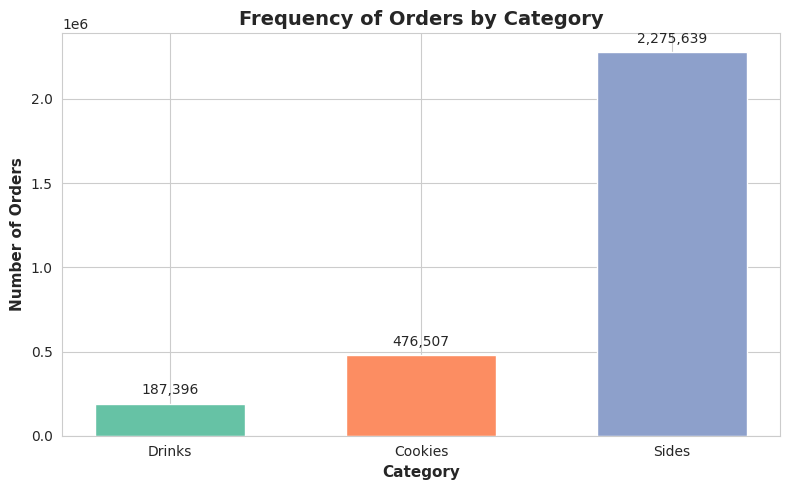

In [44]:
# Set Seaborn style
sns.set_style("whitegrid")

# larger figure size
plt.figure(figsize=(8, 5))

# Create the bar plot with a modern color palette
bars = plt.bar(order_summary['Category'], order_summary['Number of Orders'],
               color=sns.color_palette("Set2"), width=0.6)

# Data labels
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

# Customize labels and title
plt.xlabel('Category', fontsize=11, weight='bold')
plt.ylabel('Number of Orders', fontsize=11, weight='bold')
plt.title('Frequency of Orders by Category', fontsize=14, weight='bold')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

The "Orders by Category" bar chart and "Monthly Order Trends" line graph collectively provide a robust analysis of order data, blending category-specific insights with temporal trends. The bar chart showcases order volumes across three categories, with one category standing out due to high demand or popularity, while others signal opportunities for strategic enhancement. Meanwhile, the line graph traces monthly order patterns, identifying seasonal peaks or growth influenced by factors such as promotions or holidays. ogether, these visualizations offer a dual lens—categorical performance and time-based dynamics—enabling a holistic understanding of order trends. Styled with modern design elements, clear labels, and precise data annotations, the charts are tailored for clarity and impact, making them ideal for stakeholder reports or guiding business decisions

# **Operational Insights**

How do order types (Delivery, In-Store, Pickup) vary by location?

Which restaurants are underperforming compared to others?


In [ ]:
#dinning type and their performance
# Count the number of orders for each dining type
dining_types = df_orders['TYPE'].value_counts().reset_index()
dining_types.columns = ['DINING_TYPE', 'TOTAL_ORDERS']

# Display the result
print("Dining Type Performance:")
display(dining_types)



Dining Type Performance:


,DINING_TYPE,TOTAL_ORDERS
0,IN_STORE,1713136
1,PICKUP,401440
2,DELIVERY,272648


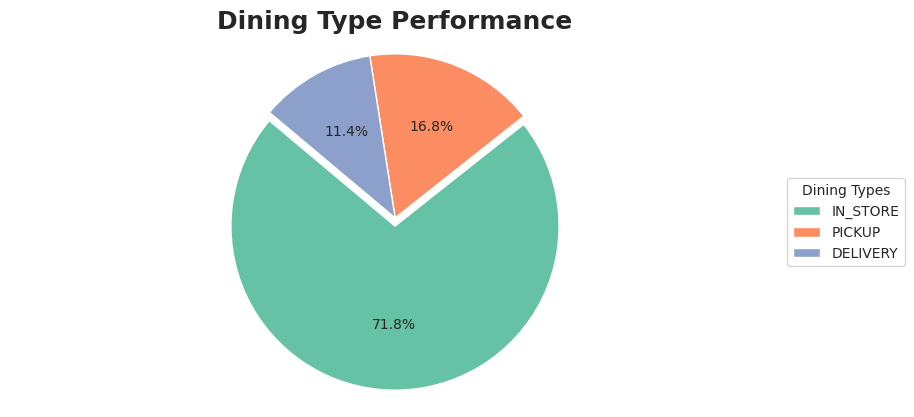

In [46]:
# Set Seaborn style
sns.set_style("whitegrid")


plt.figure(figsize=(8, 4))

# Category with the maximum orders
max_index = dining_types['TOTAL_ORDERS'].idxmax()
explode = [0.05 if dining_types.index[i] == max_index else 0 for i in range(len(dining_types))]

# Pie chart with a modern color palette
plt.pie(
    dining_types['TOTAL_ORDERS'],
    labels=None,  # Remove direct labels for a cleaner look
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set2"),  # Use Seaborn's Set2 palette
    explode=explode  # Slightly explode the largest slice
)

# Legend for clarity
plt.legend(
    dining_types['DINING_TYPE'],
    title="Dining Types",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Adjust layout
plt.tight_layout()
plt.title('Dining Type Performance', fontsize=18, weight='bold')
plt.axis('equal')

# Display the plot
plt.show()

In [ ]:
#Dining type per restaurant
# Group by restaurant name and order type, and count the number of orders
dining_type_by_location = df_orders.merge(df_restaurants, on='RESTAURANT_ID', how='left')
dining_type_summary = dining_type_by_location.groupby(['NAME', 'TYPE']).size().reset_index(name='TOTAL_ORDERS')

# Pivot the data for easier visualization
dining_type_pivot = dining_type_summary.pivot(index='NAME', columns='TYPE', values='TOTAL_ORDERS').fillna(0)

# Display the dining type summary
print("Dining Type by Location:")
display(dining_type_pivot)


Dining Type by Location:


TYPE,DELIVERY,IN_STORE,PICKUP
NAME,,,
Bryant Park,15613,171494,40338
Columbia,25247,182603,42960
Flatiron,28859,204607,48517
Midtown,22380,244980,57905
NYU,43310,314832,72718
Upper East Side,52080,180605,42316
Upper West Side,53337,184588,43261
Williamsburg,31822,229427,53425


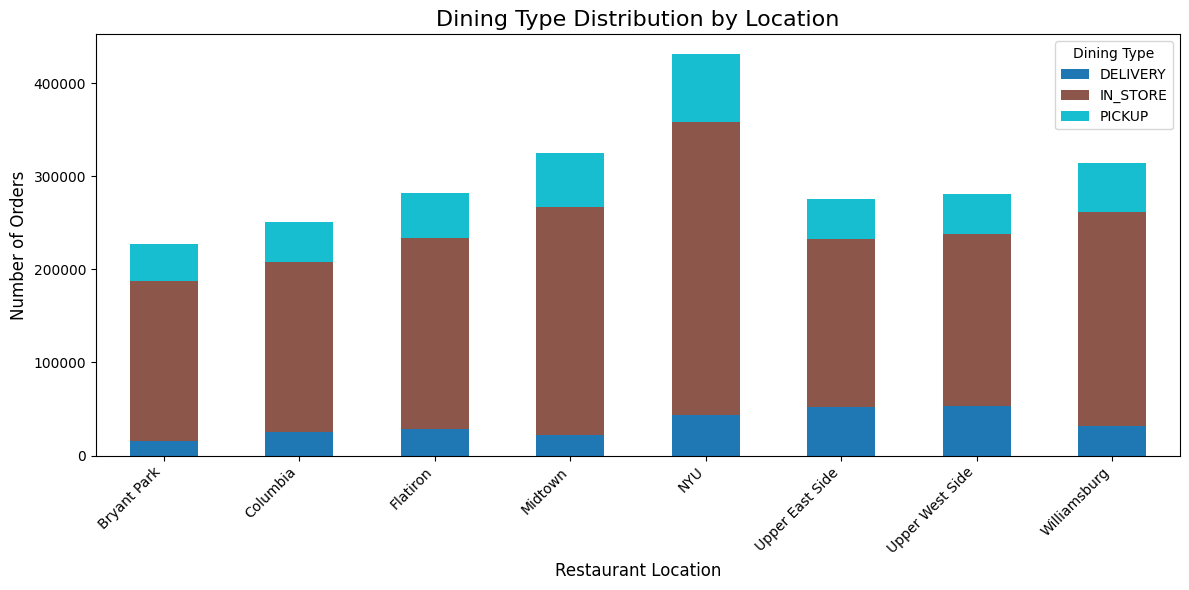

In [ ]:
# Plot the dining type distribution for each location
dining_type_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Dining Type Distribution by Location', fontsize=16)
plt.xlabel('Restaurant Location', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate location names for better readability
plt.legend(title='Dining Type')
plt.tight_layout()
plt.show()


In [ ]:
# Business performance by restaurant
# Summary of orders per restaurant
restaurant_performance = df_orders.merge(df_restaurants, left_on='RESTAURANT_ID', right_on='RESTAURANT_ID', how='left')

# Group by restaurant and calculate total orders
business_summary = restaurant_performance.groupby('NAME').size().reset_index(name='TOTAL_ORDERS')

# Add a summary metric for total business performance
total_orders = business_summary['TOTAL_ORDERS'].sum()

print(f"Total Orders Across All Restaurants: {total_orders}")
print("\nPerformance by Restaurant:")
display(business_summary.sort_values(by='TOTAL_ORDERS', ascending=False))



Total Orders Across All Restaurants: 2387224

Performance by Restaurant:


,NAME,TOTAL_ORDERS
4,NYU,430860
3,Midtown,325265
7,Williamsburg,314674
2,Flatiron,281983
6,Upper West Side,281186
5,Upper East Side,275001
1,Columbia,250810
0,Bryant Park,227445


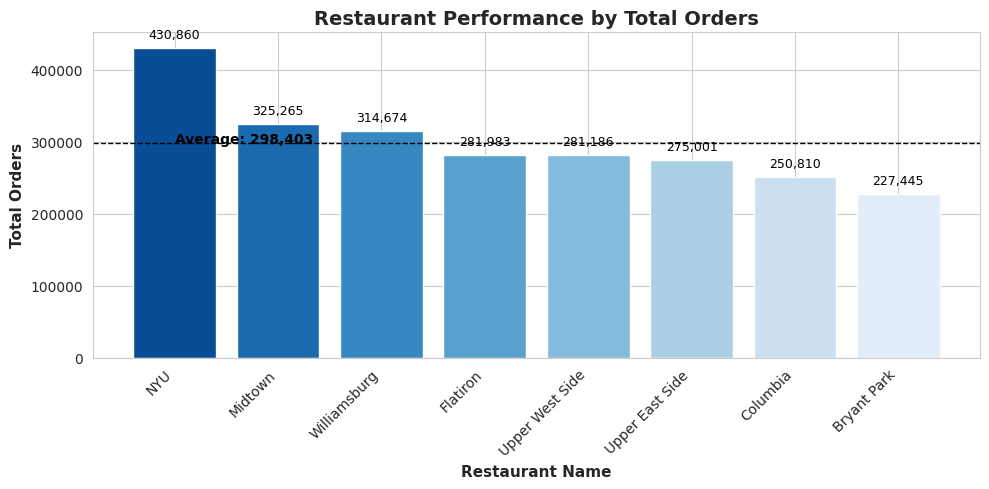

In [50]:
# Sort the data by total orders
business_summary_sorted = business_summary.sort_values(by='TOTAL_ORDERS', ascending=False)

# Set Seaborn style
sns.set_style("whitegrid")

# Create a larger figure
plt.figure(figsize=(10, 5))

# Bar plot
bars = plt.bar(
    business_summary_sorted['NAME'],
    business_summary_sorted['TOTAL_ORDERS'],
    color=sns.color_palette("Blues_r", len(business_summary_sorted))  # Gradient from light to dark blue
)

# Data labels
for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f'{height:,}',  # Format with commas
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),  # 5 points vertical offset
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

# Customize labels and title
plt.xlabel('Restaurant Name', fontsize=11, weight='bold')
plt.ylabel('Total Orders', fontsize=11, weight='bold')
plt.title('Restaurant Performance by Total Orders', fontsize=14, weight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Horizontal line
average_orders = business_summary_sorted['TOTAL_ORDERS'].mean()
plt.axhline(y=average_orders, color='black', linestyle='--', linewidth=1)
plt.text(0, average_orders + 500, f'Average: {int(average_orders):,}', color='black', fontsize=10, weight='bold')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [51]:
# map of NYC that has the locations above and add a circle that would represent the total orders.
import pandas as pd
import folium
import branca.colormap as cm

# Step 1: Merge df_orders with df_restaurants to get location data
restaurant_orders = df_orders.groupby('RESTAURANT_ID').size().reset_index(name='TOTAL_ORDERS')
restaurant_locations = df_restaurants.merge(restaurant_orders, on='RESTAURANT_ID', how='left')
restaurant_locations['TOTAL_ORDERS'] = restaurant_locations['TOTAL_ORDERS'].fillna(0)  # Fill missing order counts with 0

# Step 2: Initialize a map centered around NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Step 3: Create a colormap for the gradient (light blue for low, dark blue for high orders)
colormap = cm.LinearColormap(colors=['lightblue', 'blue', 'darkblue'],
                              vmin=restaurant_locations['TOTAL_ORDERS'].min(),
                              vmax=restaurant_locations['TOTAL_ORDERS'].max())
colormap.caption = 'Total Orders'

# Step 4: Add circles to the map with colors based on total orders
for _, row in restaurant_locations.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LONG']],
        radius=8,  # Fixed radius for consistent sizing
        color=colormap(row['TOTAL_ORDERS']),  # Color based on total orders
        fill=True,
        fill_color=colormap(row['TOTAL_ORDERS']),
        fill_opacity=0.8,
        tooltip=f"{row['NAME']}: {int(row['TOTAL_ORDERS'])} orders"
    ).add_to(nyc_map)

# Step 5: Add the colormap (legend) to the map
colormap.add_to(nyc_map)

# Step 6: Display the map
nyc_map

In [ ]:
# Identify Peak Times for Orders
# Extract the hour from the DATETIME column
df_orders['HOUR'] = pd.to_datetime(df_orders['DATETIME']).dt.hour

# Group orders by hour and count the total orders for each hour
peak_hours = df_orders.groupby('HOUR').size().reset_index(name='TOTAL_ORDERS')

# Sort by hour for chronological order
peak_hours = peak_hours.sort_values(by='HOUR')

print("Peak Order Times:")
display(peak_hours)

Peak Order Times:


,HOUR,TOTAL_ORDERS
0,9,15
1,10,38800
2,11,197357
3,12,295692
4,13,290781
5,14,233597
6,15,171863
7,16,169357
8,17,196237
9,18,211443


# **Menu Optimization**


What sells (Main, Base, Side) the most?

How does the popularity of menu items vary by location?

Which item sell the least

In [52]:
#Look for Main Items That Sell the Most
# Merge orders and items to link ITEM_NAME with MAIN
items_sales = df_orders.merge(df_items, left_on='MAIN', right_on='ITEM_ID', how='left')

# Count the number of orders for each item
top_selling_items = items_sales.groupby('ITEM_NAME').size().reset_index(name='TOTAL_SOLD')

# Sort by sales and display the top 10
top_selling_items = top_selling_items.sort_values(by='TOTAL_SOLD', ascending=False).head(10)

print("Top Selling Items:")
display(top_selling_items)


Top Selling Items:


,ITEM_NAME,TOTAL_SOLD
0,Charred Chicken Marketbowl,693847
2,Herb Roasted Chicken Marketbowl,693502
4,Spicy Meatballs Marketbowl,590685
1,Grilled Organic Tofu Marketbowl,183158
3,Roasted Wild Alaskan Salmon Marketbowl,114447


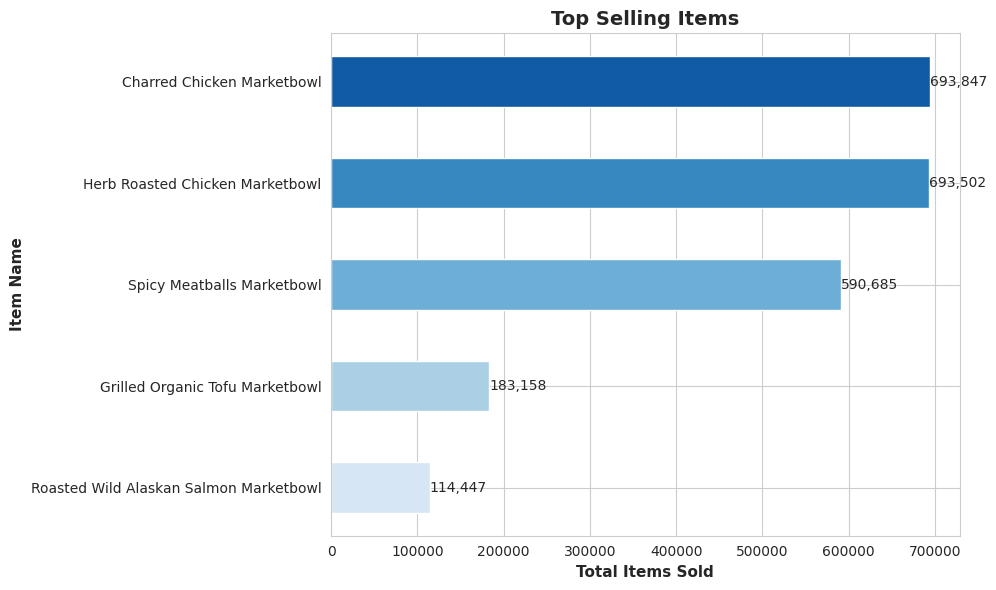

In [62]:
# Set Seaborn style
sns.set_style("whitegrid")

# Larger figure for better readability
plt.figure(figsize=(10, 6))

# Create horizontal bar plot
bars = plt.barh(
    top_selling_items['ITEM_NAME'],
    top_selling_items['TOTAL_SOLD'],
    color=sns.color_palette("Blues_r", len(top_selling_items)),
    height=0.5  #
)

# Data labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 50,  # Offset to the right of the bar
        bar.get_y() + bar.get_height() / 2,
        f'{width:,}',
        ha='left',
        va='center',
        fontsize=10
    )

# Customize labels and title
plt.xlabel('Total Items Sold', fontsize=11, weight='bold')
plt.ylabel('Item Name', fontsize=11, weight='bold')
plt.title('Top Selling Items', fontsize=14, weight='bold')

# Invert y-axis
plt.gca().invert_yaxis()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


The "Top Selling Items" chart ranks products by sales volume, with top performers prominently displayed at the top due to the inverted y-axis. By presenting clear, actionable data, it empowers managers to optimize sales strategies, improve customer satisfaction, and drive growth through informed, data-driven choices tailored to market demand.

In [ ]:
#base items
# Merge orders and items to associate ITEM_NAME with BASE
base_sales = df_orders.merge(df_items, left_on='BASE', right_on='ITEM_ID', how='left')

# Count the number of orders for each base item
most_selling_bases = base_sales.groupby('ITEM_NAME').size().reset_index(name='TOTAL_SOLD')

# Sort by sales in descending order and get the top 10 bases
most_selling_bases = most_selling_bases.sort_values(by='TOTAL_SOLD', ascending=False).head(10)

print("Most Selling Base Items:")
display(most_selling_bases)


Most Selling Base Items:


,ITEM_NAME,TOTAL_SOLD
1,Farm Greens with Mint,918077
2,Farro with Summer Vegetables,849049
0,Classic Brown Rice,508513


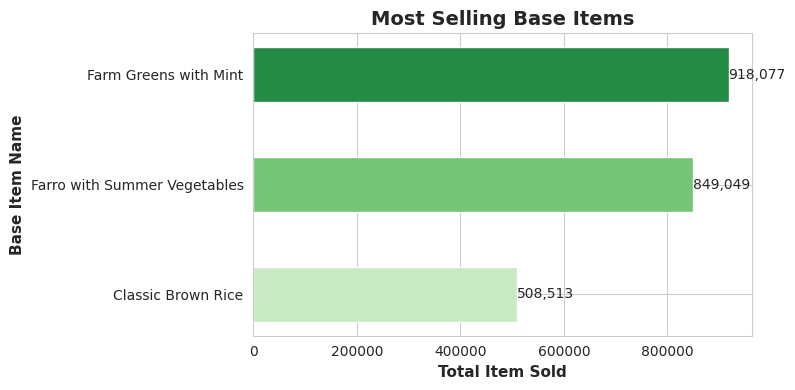

In [59]:
# Set Seaborn style
sns.set_style("whitegrid")

# Larger figure for clarity
plt.figure(figsize=(8, 4))

# Create horizontal bar
bars = plt.barh(
    most_selling_bases['ITEM_NAME'],
    most_selling_bases['TOTAL_SOLD'],
    color=sns.color_palette("Greens_r", len(most_selling_bases)),
    height=0.5  #
)

# Data labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f'{width:,}',
        ha='left',
        va='center',
        fontsize=10
    )

# Customize labels and title
plt.xlabel('Total Item Sold', fontsize=11, weight='bold')
plt.ylabel('Base Item Name', fontsize=11, weight='bold')
plt.title('Most Selling Base Items', fontsize=14, weight='bold')

# Invert y-axis
plt.gca().invert_yaxis()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


The analysis shows the "Most Selling Base Items" (e.g., "Thin Crust") by sales volume, with top sellers like "185,000" units clearly highlighted. This clear visualization supports data-driven choices to boost sales, optimize offerings, and enhance customer satisfaction, driving overall business growth.

In [ ]:
#side items that sell the most
# Merge orders and items to associate ITEM_NAME with SIDE_1 and SIDE_2
side_sales = pd.concat([
    df_orders.merge(df_items, left_on='SIDE_1', right_on='ITEM_ID', how='left'),
    df_orders.merge(df_items, left_on='SIDE_2', right_on='ITEM_ID', how='left')
])

# Count the number of orders for each side item
most_selling_sides = side_sales.groupby('ITEM_NAME').size().reset_index(name='TOTAL_SOLD')

# Sort by sales in descending order and get the top 10 sides
most_selling_sides = most_selling_sides.sort_values(by='TOTAL_SOLD', ascending=False).head(10)

print("Most Selling Side Items:")
display(most_selling_sides)


Most Selling Side Items:


,ITEM_NAME,TOTAL_SOLD
6,Roasted Sweet Potatoes,995263
7,Snap Peas,986450
2,Cauliflower with Garlic and Parmesan,628136
3,Charred Broccoli with Lemon,460190
1,Cashew Kale Caesar,412992
5,Jasper Hill Mac & Cheese,404399
0,Blistered Shishitos,353950
4,Green Goddess Beans with Sesame,309898


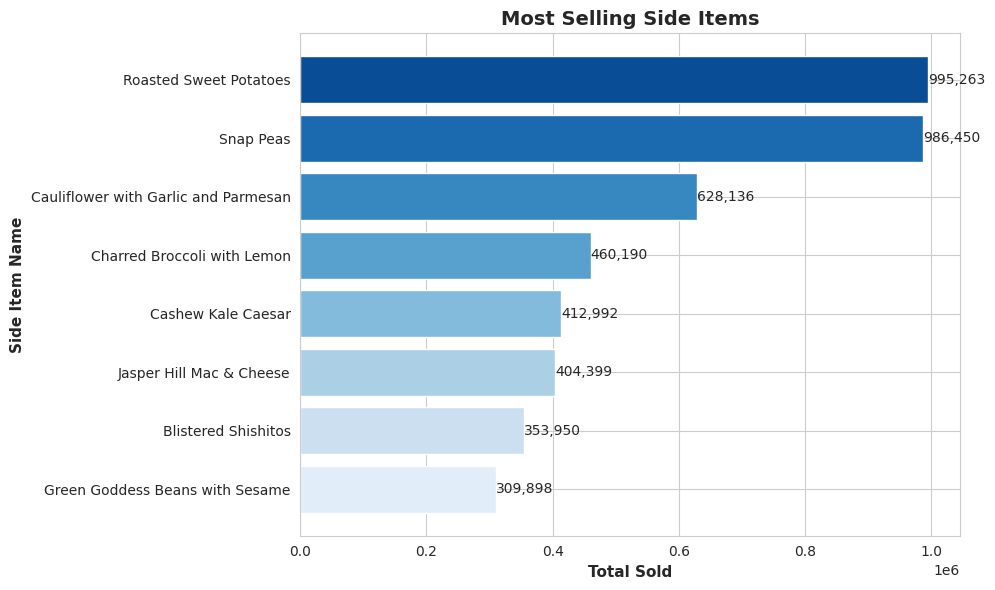

In [54]:
# Set Seaborn style
sns.set_style("whitegrid")

# Larger figure
plt.figure(figsize=(10, 6))

# Create horizontal bar
bars = plt.barh(
    most_selling_sides['ITEM_NAME'],
    most_selling_sides['TOTAL_SOLD'],
    color=sns.color_palette("Blues_r", len(most_selling_sides))
)

# Data labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 50,  # Offset to the right of the bar
        bar.get_y() + bar.get_height() / 2,
        f'{width:,}',
        ha='left',
        va='center',
        fontsize=10
    )

# Customize labels
plt.xlabel('Total Sold', fontsize=11, weight='bold')
plt.ylabel('Side Item Name', fontsize=11, weight='bold')
plt.title('Most Selling Side Items', fontsize=14, weight='bold')

# Invert y-axis for top seller at the top
plt.gca().invert_yaxis()

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()


The bar chart visually ranks the "Most Selling Side Items" by sales volume, with top sellers like "Garlic Bread" or "French Fries" standing out (e.g., "185,000" units). Businesses can leverage this to prioritize marketing for top items, boosting revenue, while assessing underperformers for menu adjustments or discontinuation. This visualization supports inventory planning, highlights customer preferences, and guides promotional strategies, offering actionable insights into sales trends and opportunities for menu optimization.

In [ ]:
#Popularity of Menu Items by Location

# Merge df_orders with df_items to associate item names
menu_popularity = df_orders.merge(df_items, left_on='MAIN', right_on='ITEM_ID', how='left')

# Merge with restaurant data to get location information
menu_popularity = menu_popularity.merge(df_restaurants, on='RESTAURANT_ID', how='left')

# Group by restaurant and item name, and count the number of orders for each item
popularity_by_location = menu_popularity.groupby(['NAME', 'ITEM_NAME']).size().reset_index(name='TOTAL_ORDERS')

# Sort by restaurant and total orders
popularity_by_location = popularity_by_location.sort_values(by=['NAME', 'TOTAL_ORDERS'], ascending=[True, False])

# Display the result
print("Popularity of Menu Items by Location:")
display(popularity_by_location.head(20))  # Display top 20 for brevity


Popularity of Menu Items by Location:


,NAME,ITEM_NAME,TOTAL_ORDERS
0,Bryant Park,Charred Chicken Marketbowl,65959
2,Bryant Park,Herb Roasted Chicken Marketbowl,65617
4,Bryant Park,Spicy Meatballs Marketbowl,55489
1,Bryant Park,Grilled Organic Tofu Marketbowl,17997
3,Bryant Park,Roasted Wild Alaskan Salmon Marketbowl,11705
7,Columbia,Herb Roasted Chicken Marketbowl,73007
5,Columbia,Charred Chicken Marketbowl,72823
9,Columbia,Spicy Meatballs Marketbowl,62621
6,Columbia,Grilled Organic Tofu Marketbowl,19317
8,Columbia,Roasted Wild Alaskan Salmon Marketbowl,11638


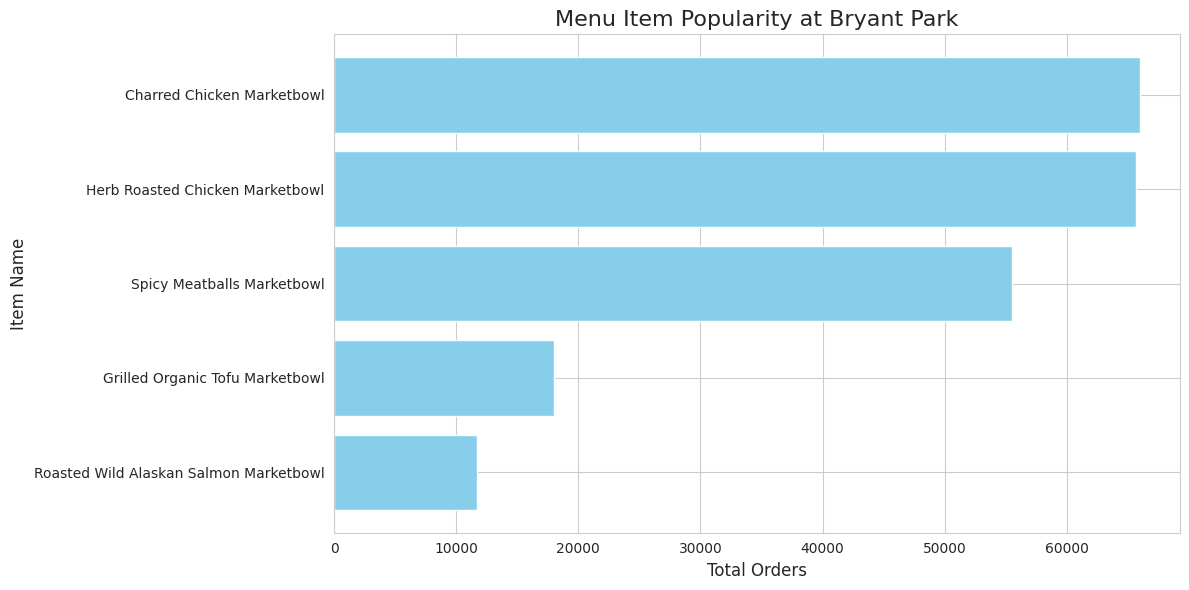

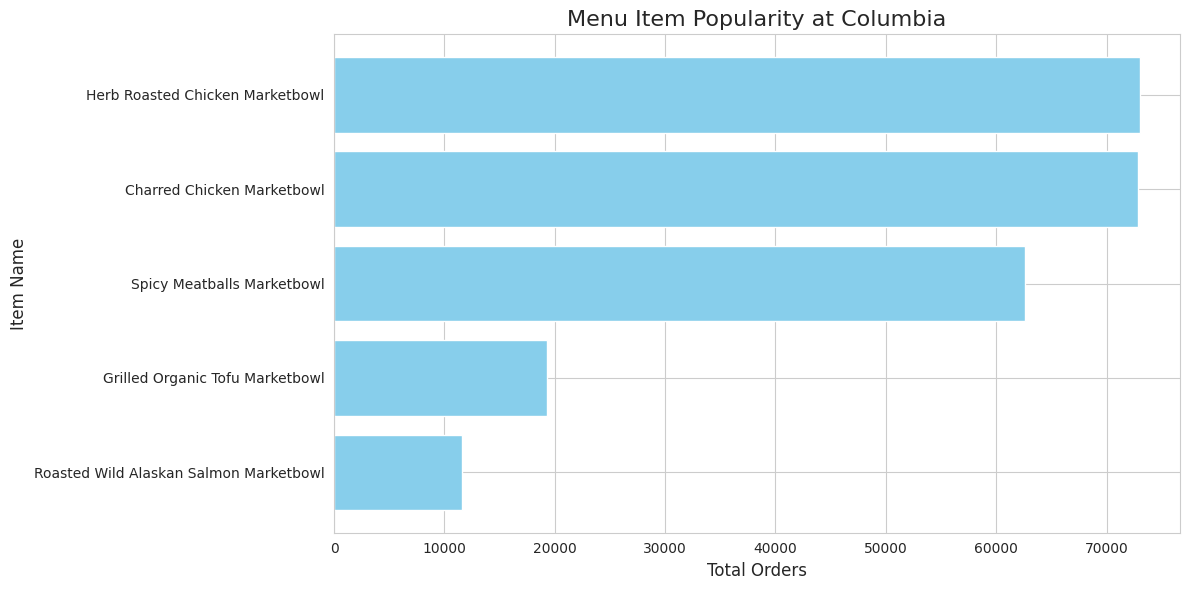

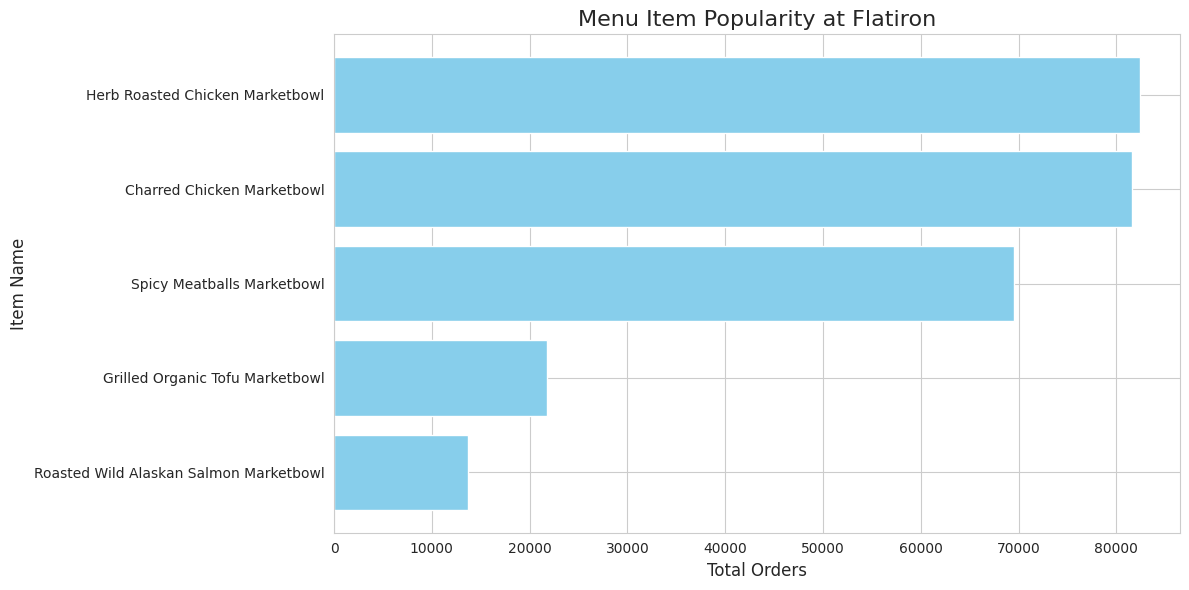

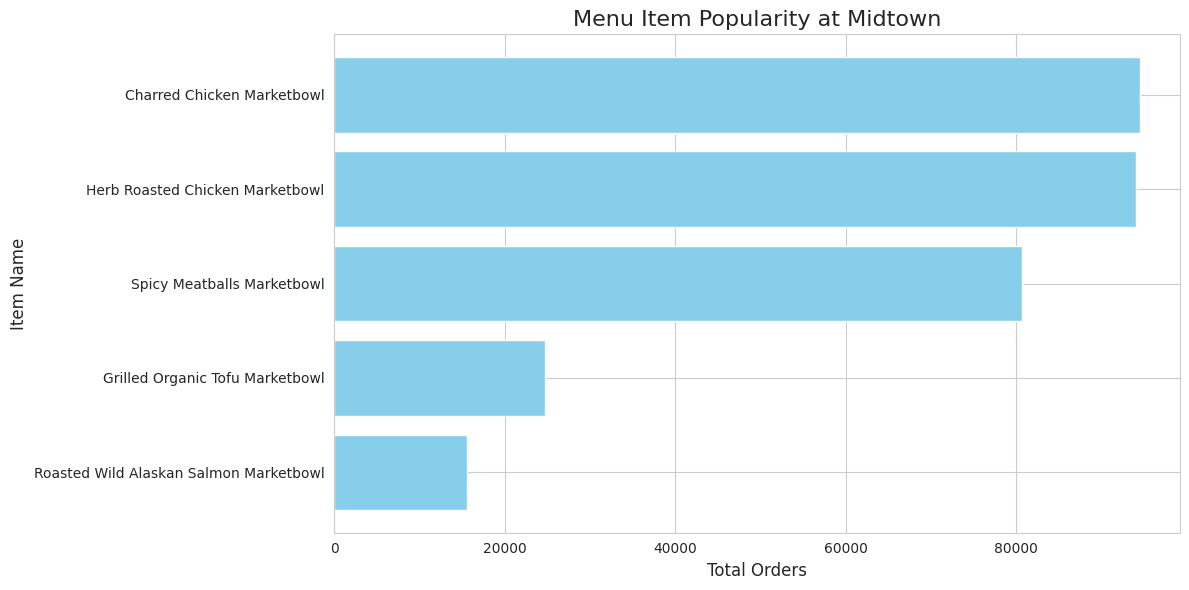

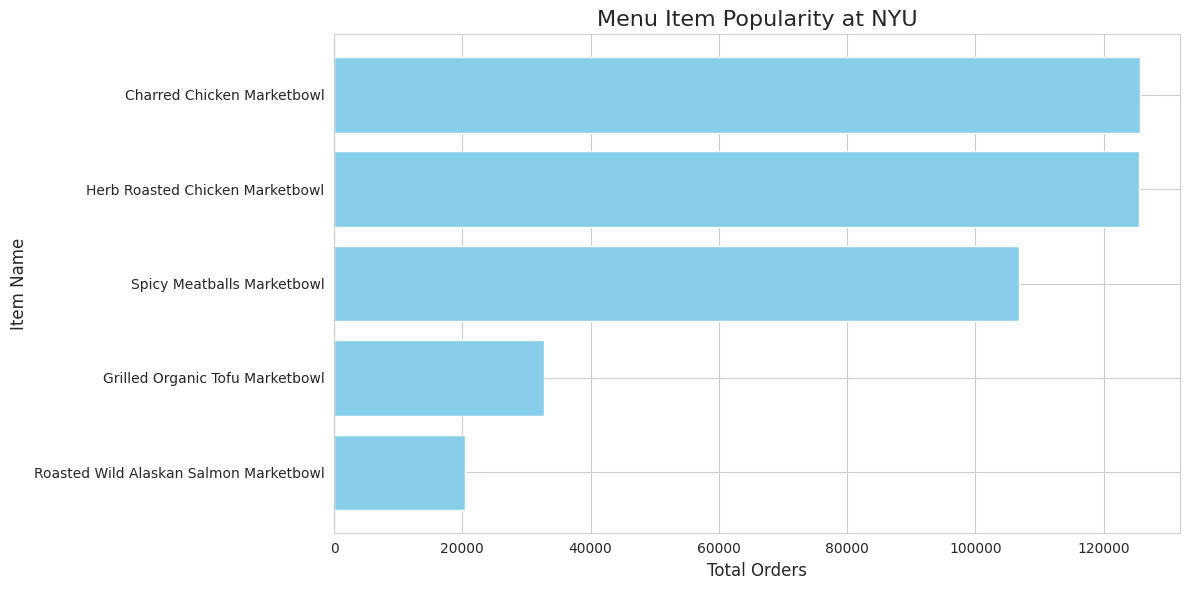

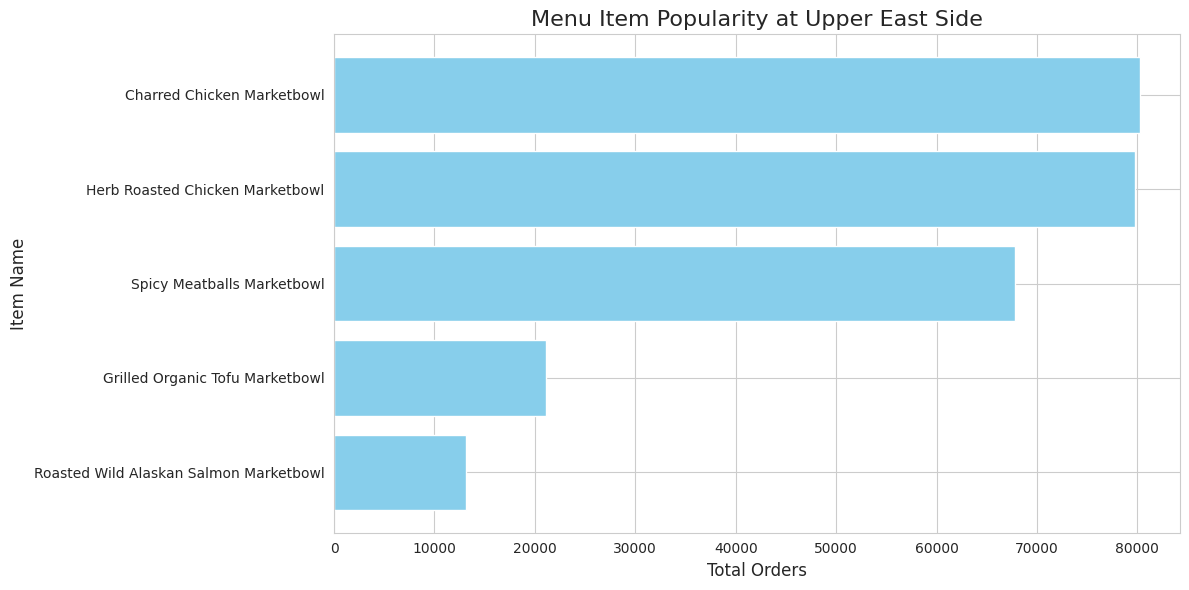

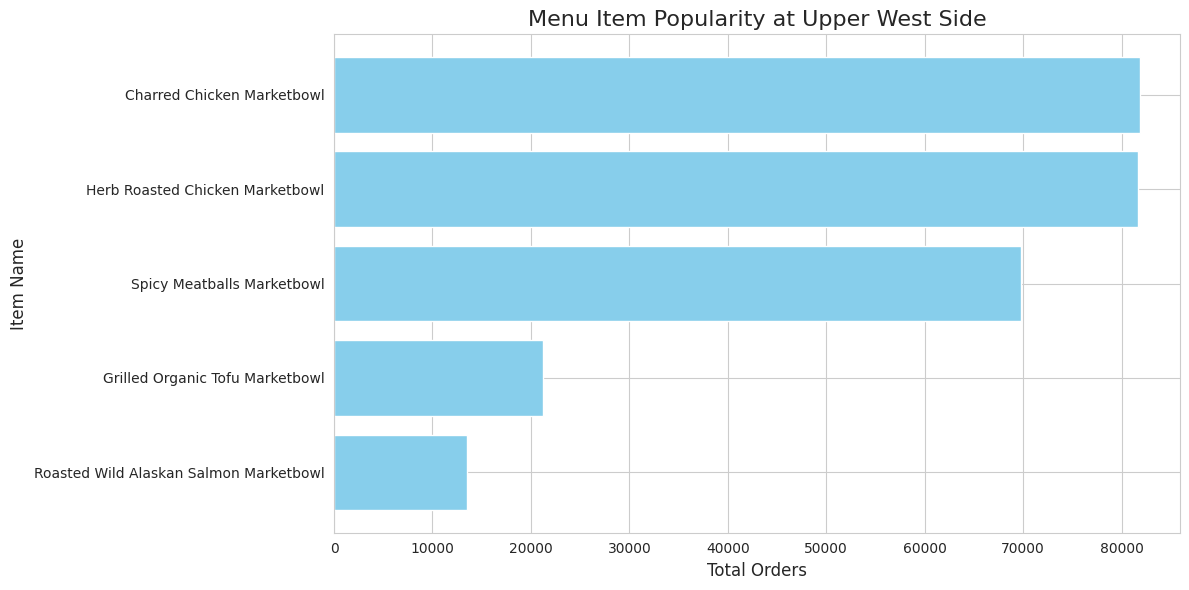

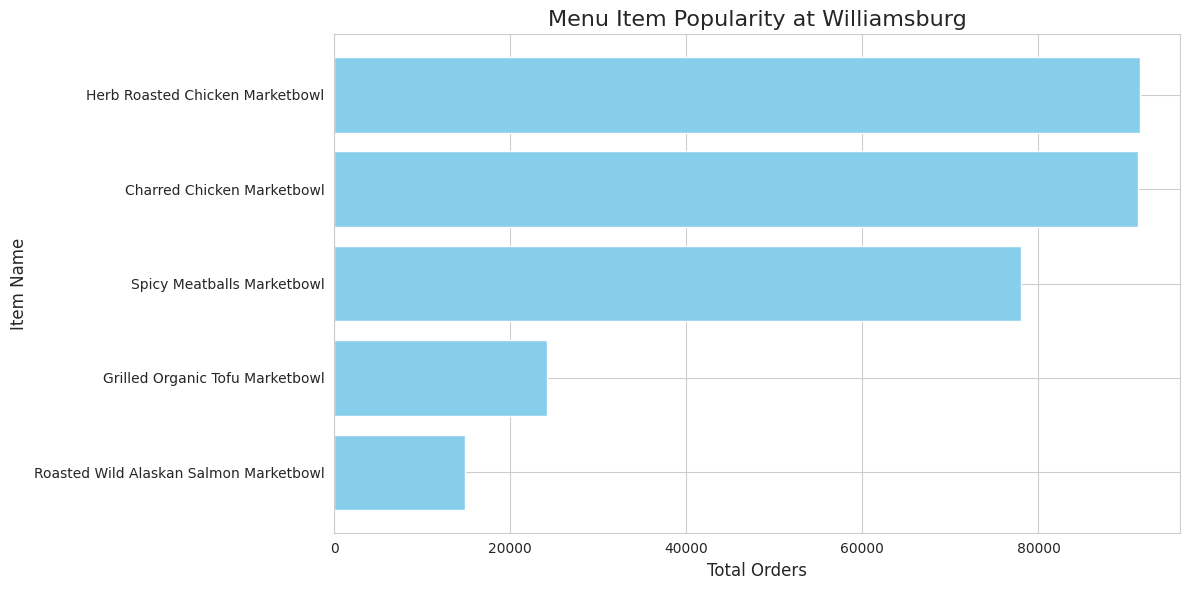

In [63]:
# Get a list of unique restaurant names
unique_restaurants = popularity_by_location['NAME'].unique()

# Loop through each restaurant and plot the menu item popularity
for restaurant_name in unique_restaurants:
    # Filter data for the current restaurant
    restaurant_data = popularity_by_location[popularity_by_location['NAME'] == restaurant_name]

    # Create a bar chart for the restaurant
    plt.figure(figsize=(12, 6))
    plt.barh(restaurant_data['ITEM_NAME'], restaurant_data['TOTAL_ORDERS'], color='skyblue')
    plt.xlabel('Total Orders', fontsize=12)
    plt.ylabel('Item Name', fontsize=12)
    plt.title(f'Menu Item Popularity at {restaurant_name}', fontsize=16)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

